# 3D simulation using Quasiisothermal distribution function
#### initilize qusiisothermal df, sample 500,000 particles, and use their postions and velcoity as the initial condition, integrate over 10Gyr
<code> df = agama.DistributionFunction(type='QuasiIsothermal',Sigma0=1e3,Rdisk=3.7,
                               Hdisk=0.8,Sigmar0=50,Rsigmar=7.4,potential=pot)<code>
What scales of Hdsik, Simgar0 (radial velocity dispersion), Rsigmar (radial scale) are good?
- Rdisk = scale length of the disk, why set Rdisk = 3.7
- Sigmar0 and Rsigmar controls the dispersion profile: exponetal with central value sigmar0 and radial scale Rsigmar. ??? Suggested Rsigmar ~ 2Rdisk
Here is an example of the orbit over 10Gyr. They look like thos plots in galpy documnetation for orbit integration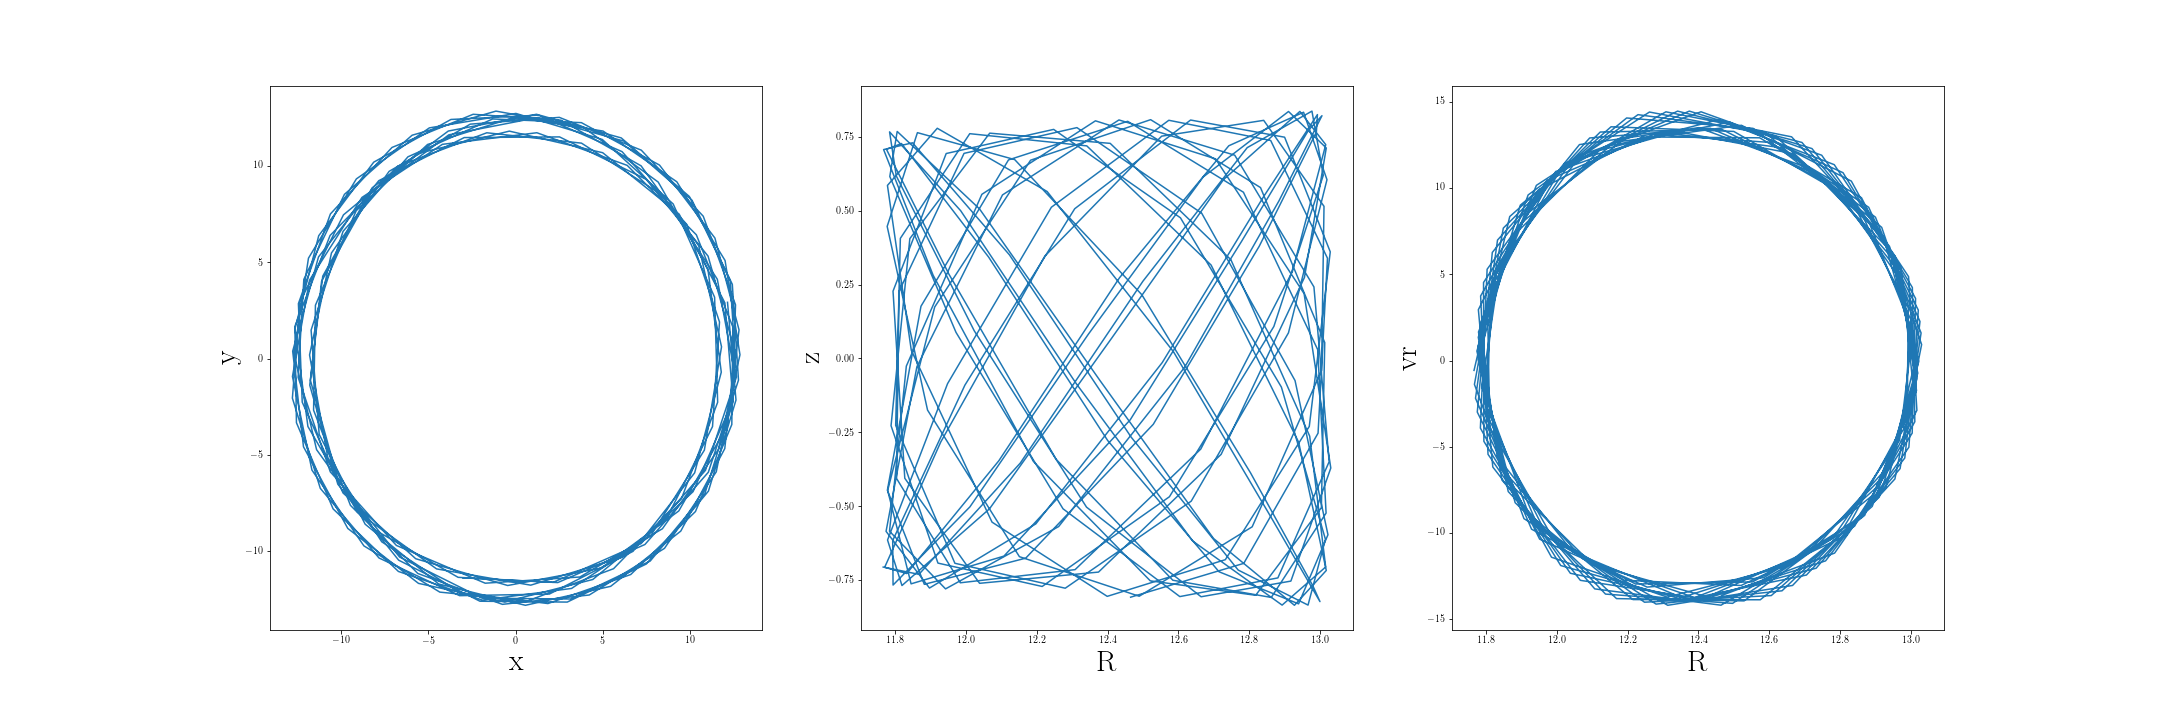    
#### integrate over 10Gyr wit Agama, thentransfer velcoity to Galactocentric coordinate, find pm and vlos
Agama returns [x,y,z,vx,vy,vz]. I used bovy_coords in galpy to make coordinate transformatio. Then define Orbit objects using (r,vR,vT,z,vz,Phi) where I have set vR to 0, and find pm and vlos fro its attributes.
To increase the number of effective test particl within the range of appropriate Taylor approximation, 
I created 4 imaginary suns. The position and velcoity [x,y,z,vx,vy,vz] of each is:
[8,0,0,0,220,0], [0,8,0,-220,0,0], [-8,0,0,0,-220,0],[0,-8,0,220,0,0] (The sun rotates in counter clockwise direction sinc the Galacto-centric coordinate is right-handed)
Here shows the test particles falls within 4kpc from the Sun (~55,000) // [<2pc,~ 18,000]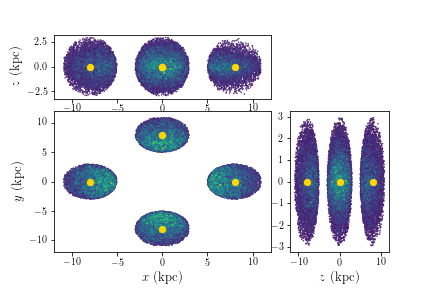

Now we are ready to look at how d range and b range affects the functions of $\Delta_{\mu_l}$,$\Delta_{\mu_b}$,$\Delta_{v_{los}}$ vs $l$. 
The dispersions in $mu_b$ and $v_{los}$ are much smaller than $\mu_l$. The dispersion in $\mu_b$ is so big that the expcted double peak pattern is barely visible after taking binned median. 

$\mu_l$ gives the most consistent double sin functions. As $d$ goes down from 4 kpc to 1kpc, the points on the scatter plot fall down to a narrower line. This implies we get smaller deivations from the model predicted by the Oort constants in the region closer to the Sun. I would not choose to restrict $d$ to 1kpc because of the costs of simulations programming. On the other hand, this simulation does not show significant effect of $b$ compared to $d$ on the results. I think the effect of $d$ is expected because of the limit of Taylor approximation. Compared to Gaia data, which Li and Bovy both restrcit to |b|<20, in this simulation (under a relatively ideal set-up of the MW disk), dividing $\cos b$ is enough. 

dividing $\cos b$ vs not:
<table>
 <tr>
    <td> <img src="./quasiisothermal/quasi_2pc_b20mulcosb.png" alt="Drawing" style="width: 250px;"/> </td>
    <td> <img src="./quasiisothermal/quasi_2pc_b20mulcosb.png" alt="Drawing" style="width: 250px;"/> </td>
 </tr>
</table>

#### Varying d range
$d<4kpc, |b|<20$ V.S. $d<2kpc, |b|<20$ V.S. $d<1kpc, |b|<20$ (# of test particles: 25560->7818->989
<table>
 <tr>
    <td> <img src="./quasiisothermal/quasi_4pc_b20mulcosb.png" alt="Drawing" style="width: 250px;"/> </td>
    <td> <img src="./quasiisothermal/quasi_2pc_b20mulcosb.png" alt="Drawing" style="width: 250px;"/> </td>
    <td> <img src="./quasiisothermal/quasi_1pc_b20mulcosb.png" alt="Drawing" style="width: 250px;"/> </td>
 </tr>
 <tr>
    <td> <img src="./quasiisothermal/quasi_4pc_b20vlosD.png" alt="Drawing" style="width: 250px;"/> </td>
    <td> <img src="./quasiisothermal/quasi_2pc_b20vlosD.png" alt="Drawing" style="width: 250px;"/> </td>
    <td> <img src="./quasiisothermal/quasi_1pc_b20vlosD.png" alt="Drawing" style="width: 250px;"/> </td>
 </tr>
 </table>
 
#### Varying b range at 2kpc
$d<2kpc, |b|<20$ vs $d<2kpc, |b|<30$ vs $d<1kpc, |b|<40$
<table>
 <tr>
    <td> <img src="./quasiisothermal/quasi_2pc_b10mulcosb.png" alt="Drawing" style="width: 250px;"/> </td>
    <td> <img src="./quasiisothermal/quasi_2pc_b20mulcosb.png" alt="Drawing" style="width: 250px;"/> </td>
    <td> <img src="./quasiisothermal/quasi_2pc_b30mulcosb.png" alt="Drawing" style="width: 250px;"/> </td>
 </tr>
 <tr>
    <td> <img src="./quasiisothermal/quasi_2pc_b10vlosD.png" alt="Drawing" style="width: 250px;"/> </td>
    <td> <img src="./quasiisothermal/quasi_2pc_b20vlosD.png" alt="Drawing" style="width: 250px;"/> </td>
    <td> <img src="./quasiisothermal/quasi_2pc_b30vlosD.png" alt="Drawing" style="width: 250px;"/> </td>
 </tr>
 </table>

As to $v_{los}$, from the plots above, visually, the effect of $b$ range is more signifcant than $d$. For the three plots with varying $d$ cut-off, the spread of scatter points around the central double sinusodial function seems to stay roughly the same. On the contray, this spread around the central line is smallest for $|b|<10$, and larger as for wider $b$ range
I would expect that, from $vlos = d(A\sin 2l + C \cos 2l + K) $, the $d$ would have a lagrer influence than $b$. However, the results above imply dividing $vlos$ by $d$ will eliminate the effect of $d$, but the effect of $b$ is implicit in the equation of $vlos$. Is there any explanation for this?


#### on $\mu_b$:
Number of test particles fall under each criteria: 
2pc&|b|~40-50:3326;  2pc&|b|~30-50:8019;  1pc&|b|~30-5-:6216;  2pc&|b|<20:7818

<table>
 <tr>
    <td> <img src="./quasiisothermal/mubmed_2pcb4050.png" alt="Drawing" style="width: 250px;"/> </td>
    <td> <img src="./quasiisothermal/mubmed_2pcb3050.png" alt="Drawing" style="width: 250px;"/> </td>
    <td> <img src="./quasiisothermal/mubmed_1pcb3050.png" alt="Drawing" style="width: 250px;"/> </td>
    <td> <img src="./quasiisothermal/mubmed_2pcb20.png" alt="Drawing" style="width: 250px;"/> </td>
 </tr>
 </table>
 
I should be using uncertainty as a messaure of which range is good. After taking away outliers, I used binned median vs $l$ and MCMC to find their uncertainties for comparison. However, I am unsure about if the liklihood function in MCMC should include all three quantities or do each one individually? Visually, I thinking $\mu_l$ and $v_{los}$ are good within 2kpc and |b|<20, and for $\mu_b$, $d<2kpc$ and $30\leq|b|\leq50$ seems the best one among the four examples above. 

<table>
 <tr>
    <td> <img src="./quasiisothermal/2pcvlos_fit.png" alt="Drawing" style="width: 250px;"/> </td>
    <td> <img src="./quasiisothermal/2pcmul_fit.png" alt="Drawing" style="width: 250px;"/> </td>
    <td> <img src="./quasiisothermal/2pcmub_fit.png" alt="Drawing" style="width: 250px;"/> </td>
 </tr>
 </table>
 (I corrected the rightmost panel after our meeting)
 
 $A = 13.98 \pm 1.32$, $B = -12.59 \pm 1.27$, $C = 0.99 \pm 1.30$, $K = -0.14 \pm 1.75$

### What we have learned from this simulation?
 
$\mu_l$: we can choose 2kpc cut-off.|b| range has lesser effect than d. 
$v_{los}$: we can choose 2kpc cut-off. d range has lesser effect than |b|.  (I will need to set sigmar0 = 15 (or smaller ) and re-run the program)


# DR2 correction

Last week, I first found A,B,C,K and u0,v0,w0 by MLE estimation on the value of vlos and mul before correction. Then I tried to determine A,C,K,u0,v0,w0 from mub with same method, but the binned median of $\mu_b$ before peculiar motiion correction did not yield the predicted sinusodial dependency.

The week, I used the u0,v0,w0 estimated from $\mu_l$ and $v_{los}$ to correct $mu_b$:
$\Delta_{\mu_l} =\frac{1}{\sin b \cos b} (\mu_b-\varpi[(u_0cosl+v_0sinl)sinb-w_0cosb])$
It seems $\Delta_{\mu_l}$ do not provide good data to fit Oort constants. 

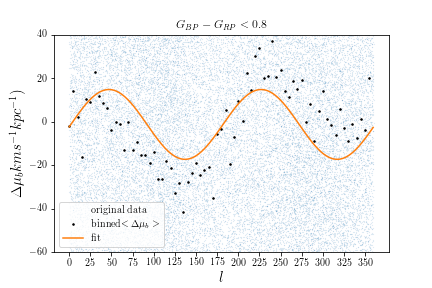
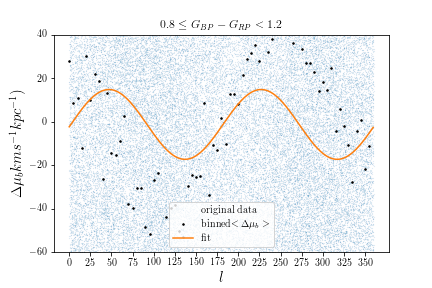


I am planning to take MCMC on $\mu_l$ and $v_los$ together to find A,B,C,K,u0,v0,w0 and their uncertainties, then, with the value of u0,v0,w0 aforesaid, correct $\Delta_{\mu_l}$, $\Delta_{\mu_b}$ and $\Delta_{v_{los}}$, and finally use MCMC on the three corrected pm and vlos to find the uncertaintiy in A,B,C and K

What I need to fix is error propgation from using the partial derivative rules to find the error in $\mu_l$, $\mu_b$ and $l$ and $b$. I calcualed the partial derivative wrong because I fogort about the errors in declination and assection angle. So the actual error propogation equation is much longer than the one I used. I also would have to do the same for $\Delta_{\mu_l}$, $\Delta_{\mu_b}$ and $\Delta_{v_{los}}$. Is there any easy way to calcualte these errors?
<table>
 <tr>
    <td> <img src="coord_change.jpg" alt="Drawing" style="width: 350px;"/> </td>
    <td> <img src="error_propagation.jpg" alt="Drawing" style="width: 350px;"/> </td>
 </tr>
<table>

# Dustmap

Dustmap takes a coordinate as input and gives the extinction at that point. We use Dustmap because we need correct color excess and extiction to divid EDR3 samples to different color groups. I am just using DR2 because we have observational data of $E(BP-RP)$ and $A_G$ in DR2, and we can compare it with the result from Dustmap so I know if Dustmap achieve desired functions. Here I plotted the extinction and color excess from Gaia on the x-axis, and the corresponding value from Dustmap on the y-axis. For both color excess and extinction, Dustmap have exteremely high values compared when the actual Gaia value around 0. The ranges of extinction and color excess value from Dustamp are larger. (For all the NaN entries I filled in with 0)

<table>
 <tr>
    <td> <img src="Ag.png" alt="Drawing" style="width: 400px;"/> </td>
    <td> <img src="ebp_rp.png" alt="Drawing" style="width: 400px;"/> </td>
 </tr>
 </table>
 
Because both $A_G$ and $E(BP\_RP)$ from Dustmap can take largers value, we see that on the H-R diagram below, $G_{BP}-G_{RP}-E(BP\_RP)$ and $G+5log_{10}(\varpi/100)-A_G$ cover different ranges. If I use Dustmap for color and extinction correction, I can't divid Gaia's main sequence star samples to different color subgroups using the criteria of Li. 

2D histoggram comparision:
For botThe ranges of $A_G$ and $E(BP-RP)$ are larger for result calculated from Dustmap. We see a higher density at (0,0) because I made all NaN entries to 0
Zoomed-in:
<table>
 <tr>
    <td> <img src=".\Apr1\2dhist_Dustmap.png" alt="Drawing" style="width: 400px;"/> </td>
    <td> <img src=".\Apr1\2dhist_Gaia.png" alt="Drawing" style="width: 400px;"/> </td>
 </tr>
 </table>
 
 <table>
 <tr>
    <td> <img src="2dhist_Dustmap.png" alt="Drawing" style="width: 400px;"/> </td>
    <td> <img src="2dhist_Gaia.png" alt="Drawing" style="width: 400px;"/> </td>
 </tr>
 </table>
 